In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Import dataset
happiness_dt = pd.read_csv('./happiness_data.csv')
happiness_dt.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
# Information about dataset
happiness_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
# Datatype of every attribute
happiness_dt.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [5]:
# Count of data under every attribute
happiness_dt.count()

Country name                        1949
year                                1949
Life Ladder                         1949
Log GDP per capita                  1913
Social support                      1936
Healthy life expectancy at birth    1894
Freedom to make life choices        1917
Generosity                          1860
Perceptions of corruption           1839
Positive affect                     1927
Negative affect                     1933
dtype: int64

In [118]:
rows = len(happiness_dt.index)
columns = len(happiness_dt.columns)

print("Total Rows: ",rows)
print("Total Columns: ",columns)

Total Rows:  1949
Total Columns:  11


In [6]:
# Missing values in data set
print('Summary of missing values for every attribute:')
print(happiness_dt.isnull().sum())
print()

missing_val = pd.DataFrame(happiness_dt.isnull().sum())

missing_data = 0
for i in happiness_dt.isnull().sum():
    missing_data += i

if missing_data == 0:
    print('No Missing Values in Data')
else:
    print('List of attributes with missing values:')
    dataset_null_val = dict(happiness_dt.isnull().sum())
    for i in dataset_null_val:
        if dataset_null_val[i]>0:
            print(i, ':', dataset_null_val[i])

Summary of missing values for every attribute:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

List of attributes with missing values:
Log GDP per capita : 36
Social support : 13
Healthy life expectancy at birth : 55
Freedom to make life choices : 32
Generosity : 89
Perceptions of corruption : 110
Positive affect : 22
Negative affect : 16


In [7]:
happiness_dt.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


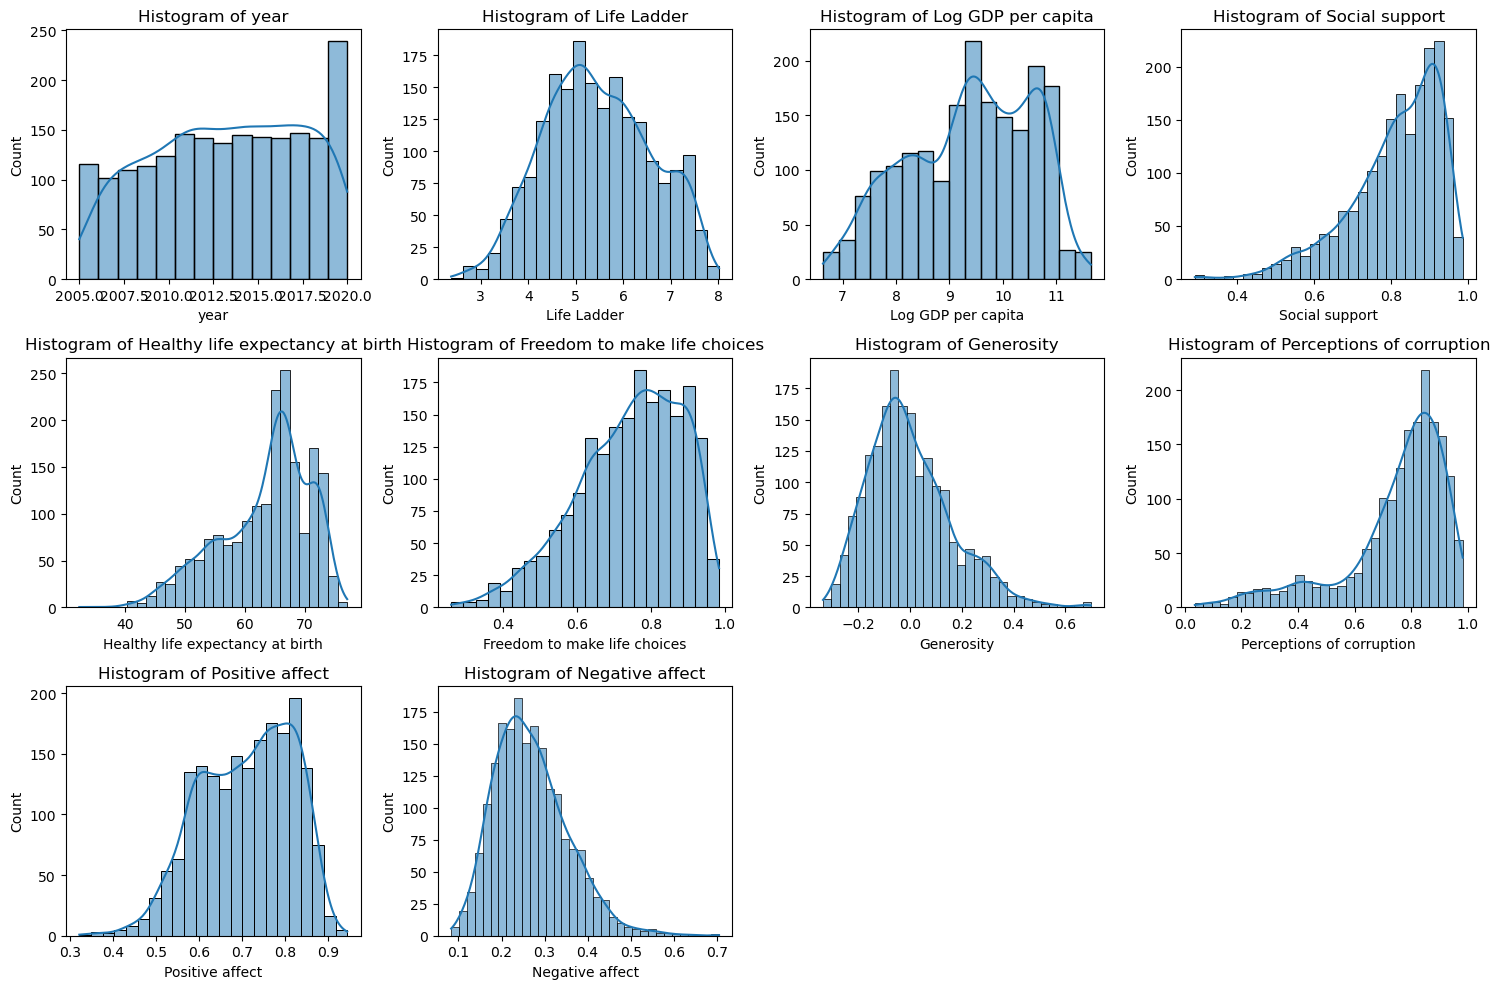

In [121]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(happiness_dt.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(happiness_dt[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [8]:
temp_happ_dt = happiness_dt
categorical_columns = temp_happ_dt.select_dtypes(include=['object']).columns
continuous_df = temp_happ_dt.drop(columns=categorical_columns)
median_values = continuous_df.median()
median_values


year                                2013.0000
Life Ladder                            5.3860
Log GDP per capita                     9.4600
Social support                         0.8355
Healthy life expectancy at birth      65.2000
Freedom to make life choices           0.7630
Generosity                            -0.0255
Perceptions of corruption              0.8020
Positive affect                        0.7220
Negative affect                        0.2580
dtype: float64

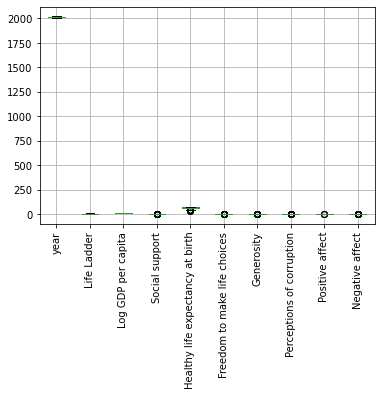

In [9]:
happiness_dt.boxplot(rot = 90)
plt.show()

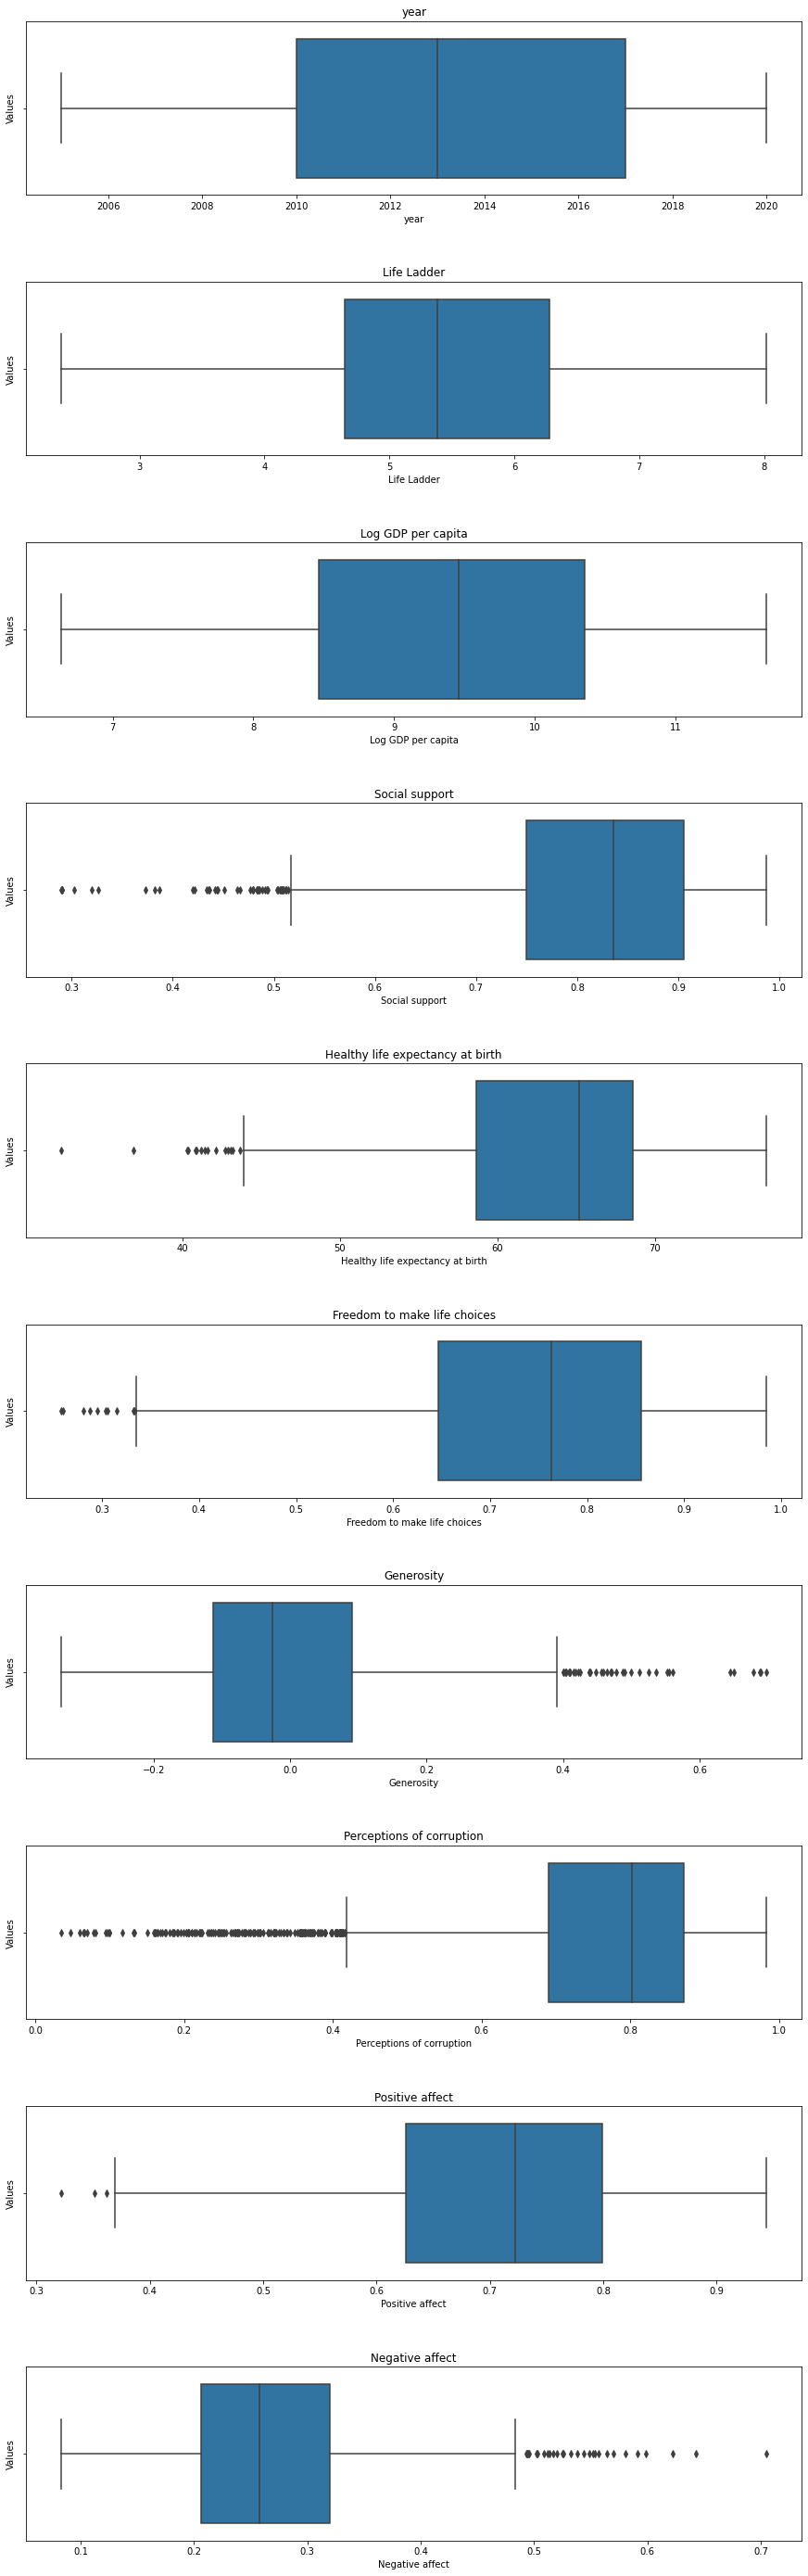

In [10]:
# Increase the figure height to accommodate all subplots.
# The width is set to 15, and the height is now set to the number of rows times an arbitrary factor.
n_rows = len(continuous_df.columns)
plt.figure(figsize=(15, n_rows * 5))  # Adjust 5 to a larger number if more space is needed

for i, column in enumerate(continuous_df.columns):
    plt.subplot(n_rows, 1, i + 1)
    sns.boxplot(x=continuous_df[column], orient="h")
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Values')

# Adjust this to give more space between plots if needed
plt.subplots_adjust(hspace=0.5)

# If the above line does not help, you can comment it out and use this instead:
# plt.tight_layout(pad=2.0)

plt.show()

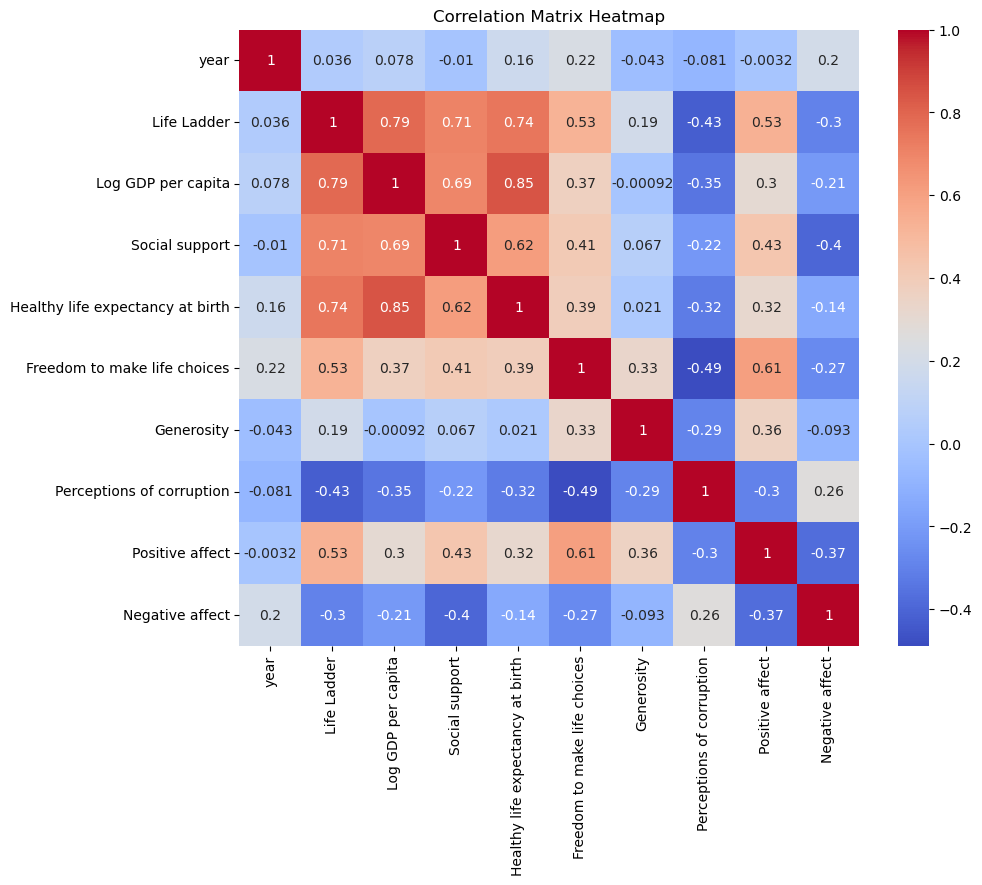

In [125]:
# Correlation matrix and heatmap
correlation_matrix = continuous_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

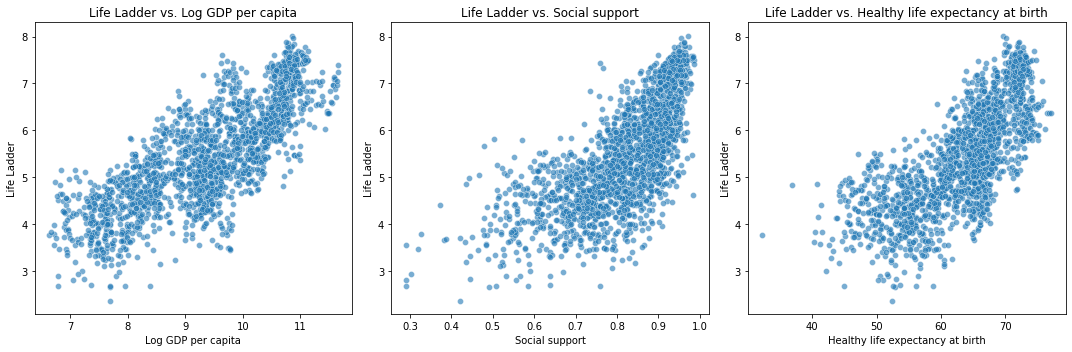

In [11]:
key_attributes = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(key_attributes):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=continuous_df, x=attribute, y='Life Ladder', alpha=0.6)
    plt.title(f'Life Ladder vs. {attribute}')
plt.tight_layout()
plt.show()

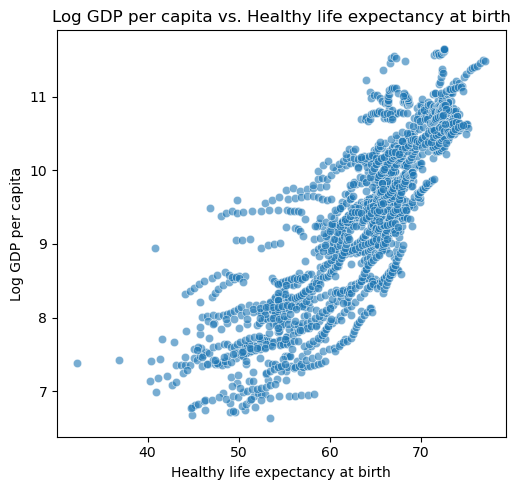

In [127]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, i + 1)
sns.scatterplot(data=continuous_df, x='Healthy life expectancy at birth', y='Log GDP per capita', alpha=0.6)
plt.title(f'Log GDP per capita vs. {attribute}')
plt.tight_layout()
plt.show()

In [12]:
# Data Cleaning
cleaned_df = temp_happ_dt
continuous_df = continuous_df.drop(columns='year')
cleaned_df = cleaned_df.drop(columns='year')

In [13]:
# Filling missing value
for column in continuous_df:
    median_value = cleaned_df[column].median()
    cleaned_df[column].fillna(median_value, inplace=True)

continuous_df = continuous_df.drop(columns='Healthy life expectancy at birth')
# Check if there are any missing values left
print(cleaned_df.isnull().sum())

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


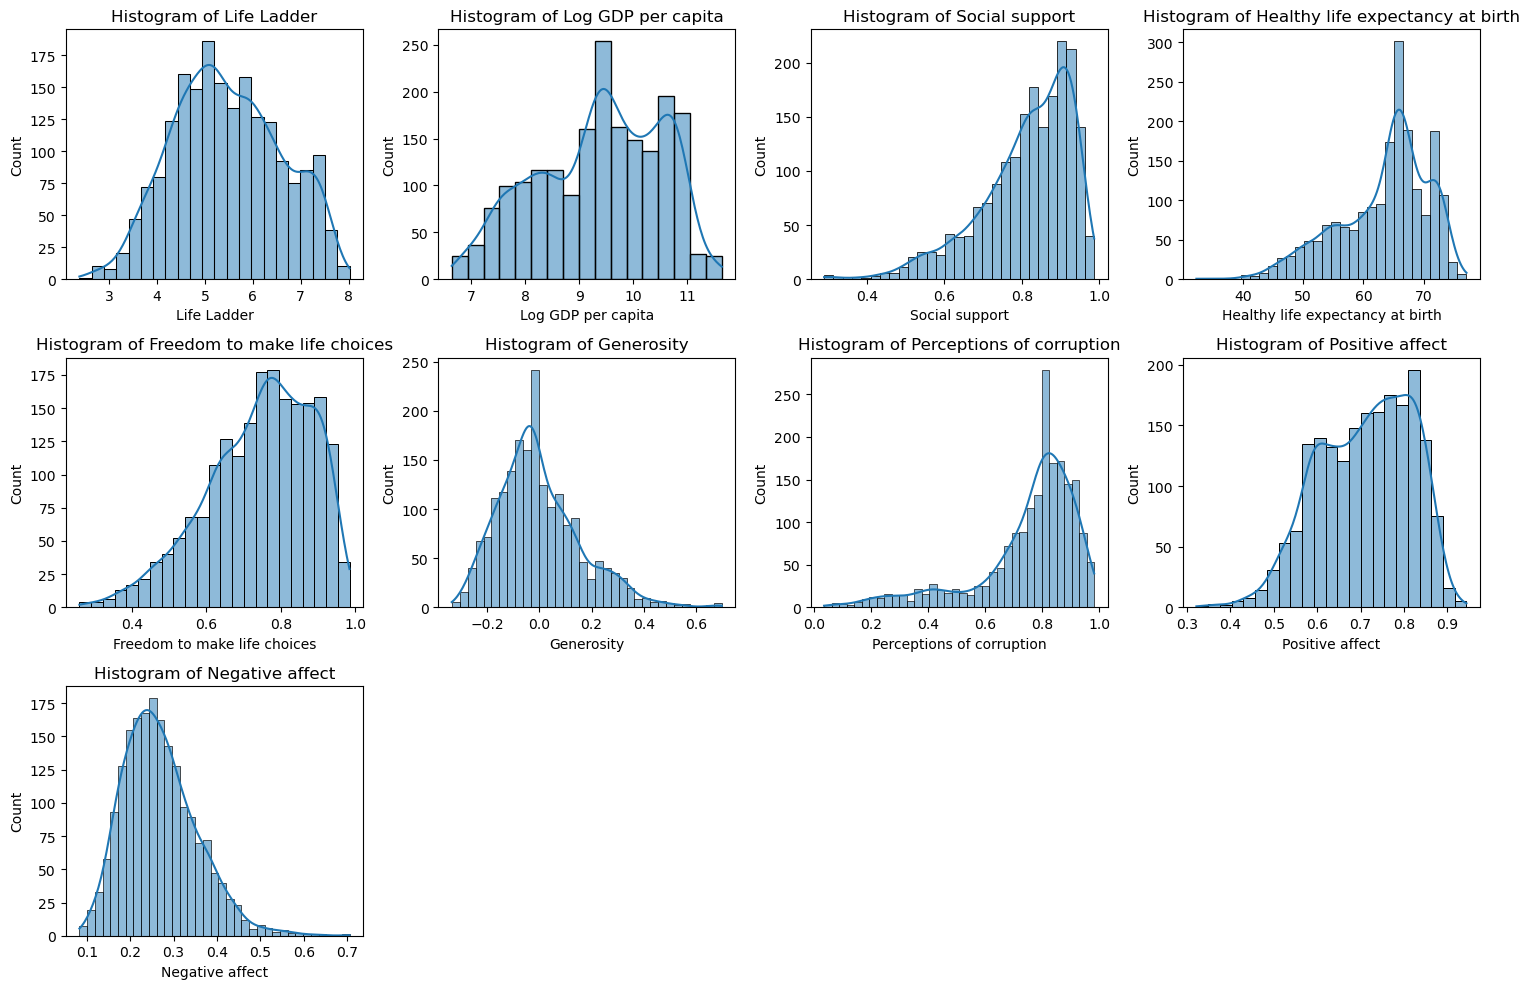

In [130]:
plt.figure(figsize=(15, 10))
num_columns = 4
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
num_rows = (len(numerical_columns) - 1) // num_columns + 1
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.histplot(cleaned_df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [14]:
# Apply IQR to handle outliers
def treat_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_capped = column.clip(lower_bound, upper_bound)
    return column_capped

for column in continuous_df:
    cleaned_df[column] = treat_outliers_iqr(cleaned_df[column])

In [15]:
# Encode categorical data
cleaned_continuous_columns = cleaned_df.drop(columns='Country name')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cleaned_df['Country name'] = label_encoder.fit_transform(cleaned_df['Country name'])

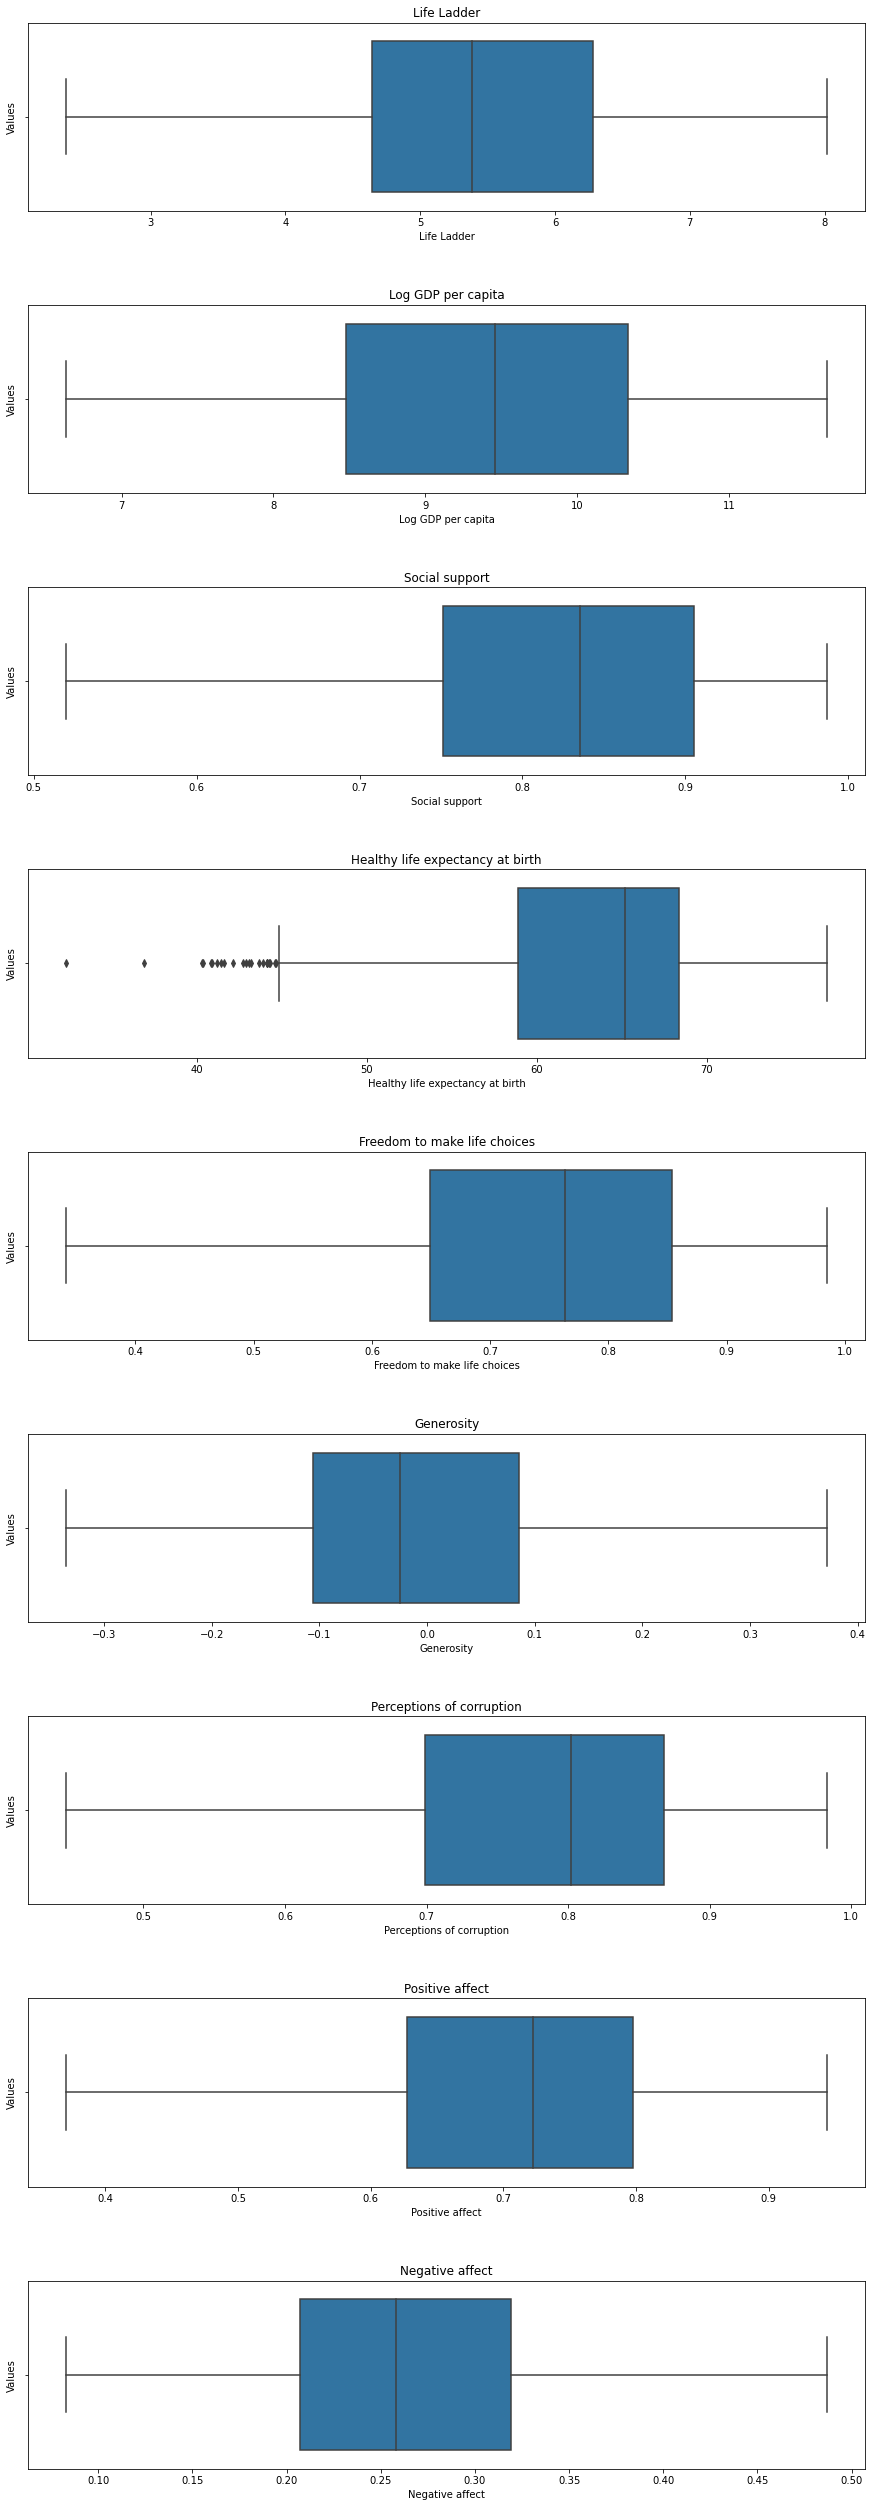

In [16]:
n_rows = len(cleaned_continuous_columns.columns)
plt.figure(figsize=(15, n_rows * 5))  # Adjust 5 to a larger number if more space is needed

for i, column in enumerate(cleaned_continuous_columns.columns):
    plt.subplot(n_rows, 1, i + 1)
    sns.boxplot(x=cleaned_continuous_columns[column], orient="h")
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [17]:
from scipy import stats
for column in continuous_df:
    cleaned_df[column] = cleaned_df[column] + 1  # Adjust this as needed to ensure all values are positive
 
    # Apply Box-Cox Transformation
    cleaned_df[column], fitted_lambda = stats.boxcox(cleaned_df[column])

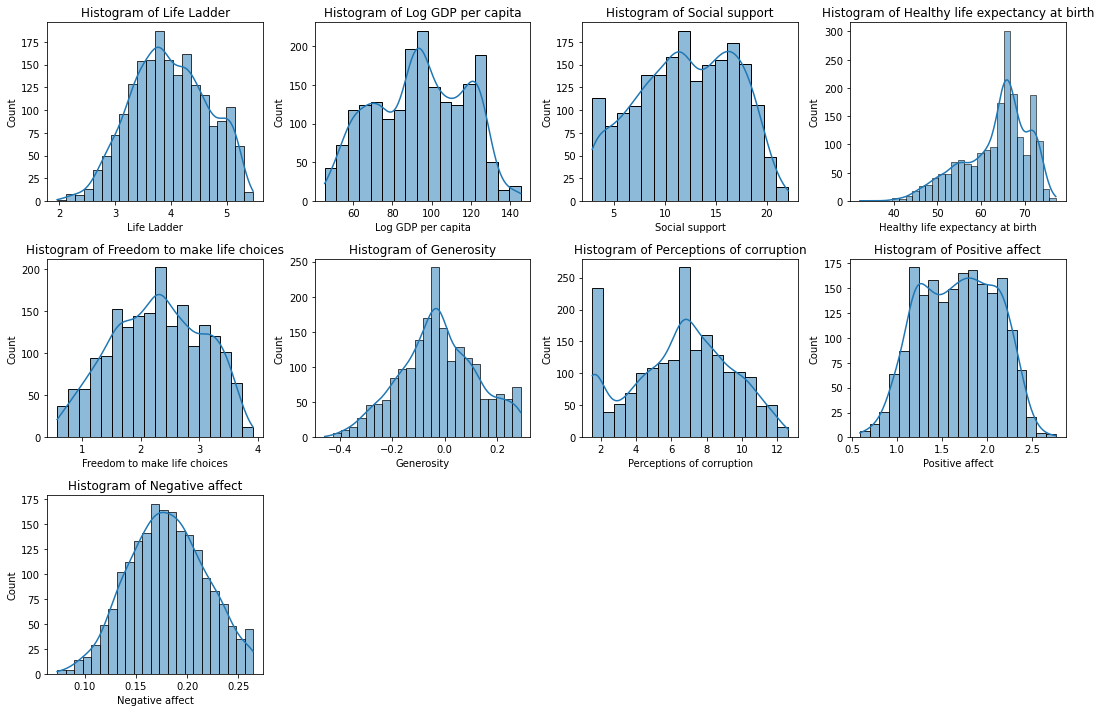

In [18]:
plt.figure(figsize=(15, 10))
num_columns = 4
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
num_rows = (len(numerical_columns) - 1) // num_columns + 1
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.histplot(cleaned_df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [19]:
cleaned_df.to_csv('cleaned_happiness_data.csv', index=False)

In [20]:
# Import dataset
cl_happiness_dt = pd.read_csv('./cleaned_happiness_data.csv')
cl_happiness_dt.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,2.891524,56.198163,2.895040,50.80,2.039873,0.148891,8.969246,0.970704,0.180071
1,0,3.330844,58.866706,3.402983,51.20,1.832320,0.165947,8.014808,1.177482,0.169738
2,0,3.555549,60.581883,3.188386,51.60,1.456082,0.110732,4.710309,1.293141,0.188040
3,0,2.962581,60.146482,2.909901,51.92,1.042620,0.144153,5.168254,1.268805,0.184333
4,0,2.930395,61.523132,2.909901,52.24,1.172067,0.200083,6.125420,1.639308,0.184800


In [21]:
from sklearn.model_selection import train_test_split

In [48]:
X = cl_happiness_dt.drop(columns=['Healthy life expectancy at birth', 'Life Ladder'])
y = cl_happiness_dt['Healthy life expectancy at birth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Mean Healthy life expectancy (Entire Dataset):", y.mean())
print("Mean Healthy life expectancy (Test Set):", y_test.mean())

Mean Healthy life expectancy (Entire Dataset): 63.41131554643394
Mean Healthy life expectancy (Test Set): 63.55240256410258


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_rmses_poly = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    polyreg = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())    
    kf = KFold(n_splits = 4, shuffle = True, random_state = 42)
    mse_scores = -cross_val_score(polyreg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    avg_rmse_poly = np.mean(rmse_scores)
    cv_rmses_poly.append(avg_rmse_poly)

# Find the degree with the lowest cross-validation MSE
print(cv_rmses_poly)
best_degree = degrees[cv_rmses_poly.index(min(cv_rmses_poly))]
print("\nBest Polynomial Regression Degree:", best_degree)
print("Cross-Validation MSE for Best Degree:", min(cv_rmses_poly))

[4.031984667965852, 3.6920156809123137, 3.8754888477707667, 6.133824872940029, 18.650252614024232]

Best Polynomial Regression Degree: 2
Cross-Validation MSE for Best Degree: 3.6920156809123137


In [25]:
from sklearn.linear_model import SGDRegressor

cv_rmses_polysgd = []
degrees = [1, 2, 3]

for degree in degrees:
    polyreg_sgd = make_pipeline(PolynomialFeatures(degree=degree), SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(polyreg_sgd, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    avg_mse_poly_sgd = np.mean(rmse_scores)
    cv_rmses_polysgd.append(avg_mse_poly_sgd)
    print(f'Degree: {degree}: {avg_mse_poly_sgd}')
    
print(cv_rmses_polysgd)
best_degree = degrees[cv_rmses_polysgd.index(min(cv_rmses_polysgd))]
print("\nBest Polynomial Regression Degree:", best_degree)
print("Cross-Validation MSE for Best Degree:", min(cv_rmses_polysgd))

Degree: 1: 3.9942481443984694
Degree: 2: 3.677983208654978
Degree: 3: 4.066725592744455
[3.9942481443984694, 3.677983208654978, 4.066725592744455]

Best Polynomial Regression Degree: 2
Cross-Validation MSE for Best Degree: 3.677983208654978


In [143]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
alphas = [0.001, 0.1, 0.5, 0.75, 1]
l1_ratios = [0.1, 0.5, 0.9]
for alpha in alphas:
    ridge_reg = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=alpha))
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    rdg_rmse_scores = np.sqrt(mse_scores)
    avg_mse_ridge = np.mean(rdg_rmse_scores)
    print(f"Ridge (alpha={alpha}): Average MSE = {avg_mse_ridge}")
    
    lasso_reg = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=alpha))
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(lasso_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    lss_rmse_scores = np.sqrt(mse_scores)
    avg_mse_lasso = np.mean(lss_rmse_scores)
    print(f"Lasso (alpha={alpha}): Average MSE = {avg_mse_lasso}")

    for l1_ratio in l1_ratios:
        elasticnet_reg = make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
        kf = KFold(n_splits=4, shuffle=True, random_state=42)
        mse_scores = -cross_val_score(elasticnet_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
        el_rmse_scores = np.sqrt(mse_scores)
        avg_mse_elasticnet = np.mean(el_rmse_scores)
        print(f"Elastic Net (alpha={alpha}, l1_ratio={l1_ratio}): Average MSE = {avg_mse_elasticnet}")
    
    print()


Ridge (alpha=0.001): Average MSE = 3.6631705480202177
Lasso (alpha=0.001): Average MSE = 3.662581511922286
Elastic Net (alpha=0.001, l1_ratio=0.1): Average MSE = 3.6627585166621492
Elastic Net (alpha=0.001, l1_ratio=0.5): Average MSE = 3.6626798649899306
Elastic Net (alpha=0.001, l1_ratio=0.9): Average MSE = 3.6626007018219187

Ridge (alpha=0.1): Average MSE = 3.663135766186112
Lasso (alpha=0.1): Average MSE = 3.7022572274810206
Elastic Net (alpha=0.1, l1_ratio=0.1): Average MSE = 3.7080397636757643
Elastic Net (alpha=0.1, l1_ratio=0.5): Average MSE = 3.692756288578103
Elastic Net (alpha=0.1, l1_ratio=0.9): Average MSE = 3.699316825960497

Ridge (alpha=0.5): Average MSE = 3.66299837446917
Lasso (alpha=0.5): Average MSE = 3.955961440346869
Elastic Net (alpha=0.5, l1_ratio=0.1): Average MSE = 4.088869567680211
Elastic Net (alpha=0.5, l1_ratio=0.5): Average MSE = 4.018988182982678
Elastic Net (alpha=0.5, l1_ratio=0.9): Average MSE = 3.9567805237119558

Ridge (alpha=0.75): Average MSE = 3.

In [144]:
# Check for Overfitting/Underfitting with Validation Loss (Polynomial Regression)
polyreg_best = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyreg_best.fit(X_train_scaled, y_train)
polyreg_pred_train = polyreg_best.predict(X_train_scaled)
polyreg_pred_test = polyreg_best.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, polyreg_pred_train)
test_mse = mean_squared_error(y_test, polyreg_pred_test)

print("\nPolynomial Regression (Best Degree) Train MSE:", train_mse)
print("Polynomial Regression (Best Degree) Test MSE:", test_mse)

# Interpret validation loss to check for overfitting/underfitting
if train_mse < test_mse:
    print("The model may be underfitting as Train MSE < Test MSE.")
elif train_mse > test_mse:
    print("The model may be overfitting as Train MSE > Test MSE.")
else:
    print("The model appears to have a good fit as Train MSE = Test MSE.")
print('diff',train_mse-test_mse)


Polynomial Regression (Best Degree) Train MSE: 12.68650595001606
Polynomial Regression (Best Degree) Test MSE: 15.315684775806774
The model may be underfitting as Train MSE < Test MSE.
diff -2.6291788257907136


In [39]:
X_train_scaled.shape
y_train.shape

(1559,)

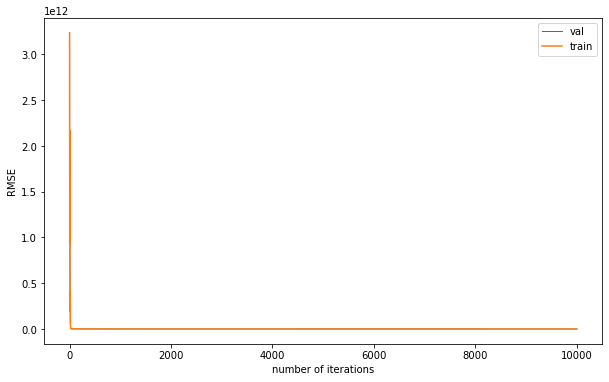


----------------------------- Model Evaluation -----------------------------


ValueError: Found input variables with inconsistent numbers of samples: [997, 1247]

In [51]:
# SGD with varying epochs
#split the train into train and validation set
from sklearn.metrics import mean_squared_error
X_train_sgd, X_valid, y_train_sgd, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
lin_reg_sgd = SGDRegressor(eta0=0.001, random_state=42)
n_epochs =10000
mse_train_list, mse_validation_list = [], []
for i in range(n_epochs):
  lin_reg_sgd.partial_fit(X_train_sgd, y_train_sgd)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train_sgd)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = np.sqrt(mean_squared_error(y_train_sgd,y_train_predicted_sgd))
  valid_score = np.sqrt(mean_squared_error(y_valid,y_valid_predicted_sgd))
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(n_epochs)], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in range(n_epochs)], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("number of iterations")
plt.ylabel("RMSE")
plt.show()
print("\n----------------------------- Model Evaluation -----------------------------")

     


In [52]:
# Make prediction
y_train_predicted_sgd = lin_reg_sgd.predict(X_train_sgd)
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train_sgd, y_train_predicted_sgd))

Training: Mean squared error: 87143541370340.95


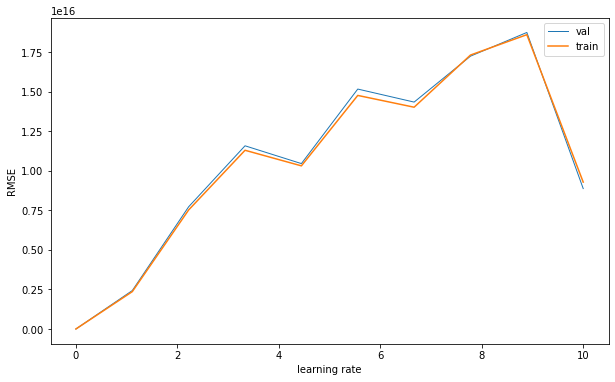

Intercept: 
 [-4.33796074e+12]
Coefficients: 
 [ 6.13268250e+13 -1.14839357e+14 -1.67058588e+14 -4.19477269e+13
  5.27250139e+12 -2.41504479e+13 -4.52680288e+13 -2.00360450e+12]

----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 86255967268249318806855553646592.00
Test: Mean squared error: 84434658887185626190218145038336.00


In [55]:
# SGD for various learning rate
#split the train into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
mse_train_list, mse_validation_list = [], []
learning_rate = np.linspace(0.001,10,10)
for i in learning_rate:
  lin_reg_sgd = SGDRegressor(eta0=i, random_state=42)
  lin_reg_sgd.partial_fit(X_train, y_train)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = mean_squared_error(y_train,y_train_predicted_sgd,squared=False)
  valid_score = mean_squared_error(y_valid,y_valid_predicted_sgd,squared=False)
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in learning_rate], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in learning_rate], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("learning rate")
plt.ylabel("RMSE")
plt.show()

# The intercept
print("Intercept: \n", lin_reg_sgd.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_sgd.coef_)
print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
y_test_predicted_sgd = lin_reg_sgd.predict(X_test)
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))
print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted_sgd))